Nesse curso, usaremos a base de dados do MNIST para aprender sobre CNN

In [1]:
# Importações
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
# Baixamos o dataset
dataset = MNIST(root='data/', download=True)

In [3]:
len(dataset)

60000

In [4]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [5]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

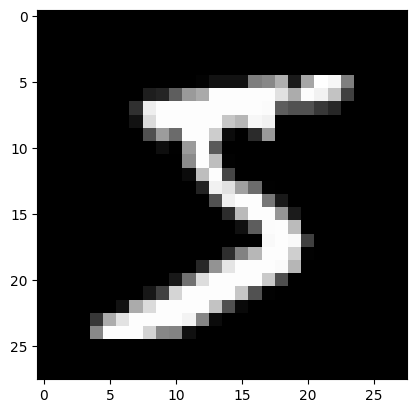

In [7]:
# Mostramos a imagem
image, label = dataset[0]
plt.imshow(image, cmap='gray')

In [8]:
import torchvision.transforms as transforms

PyTorch não é uma biblioteca para processamento de imagens, e sim de tensores. Portanto, precisamos converter a imagem em tensores.

In [9]:
dataset = MNIST(root="data/", train=True, transform=transforms.ToTensor())

In [10]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)
# torch.Size([1, 28, 28]) 5 --> 1 canal de cor, 28x28 pixels que representa o 5

torch.Size([1, 28, 28]) 5


In [11]:
print(img_tensor[:, 10:15, 10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


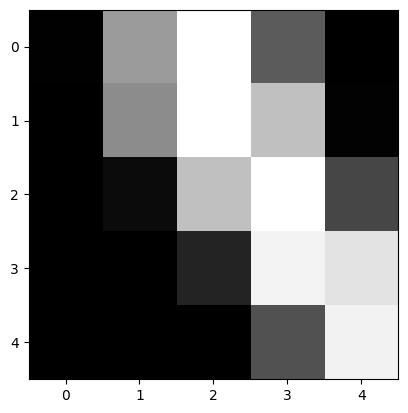

In [12]:
plt.imshow(img_tensor[0, 10:15, 10:15], cmap='gray')

## Treinamento e Validação

Para construir modelos para aplicações reais de aprendizado de máquina, precisamos separar o dataset em 3 partes:

1. Treinamento: Usado para o treinamento do modelo;
2. Validação: Usado para validar o modelo durante o treinamento;
3. Teste: Usado para comparar diferentes resultados de modelos diferentes e medir a acurácia.

In [13]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [14]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [15]:
import torch.nn as nn

input_size = 28 * 28
num_classes = 10

# Modelo de regressão logística
model = nn.Linear(input_size, num_classes)

In [16]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0283, -0.0279,  0.0056,  ..., -0.0185,  0.0138,  0.0192],
        [-0.0312,  0.0345,  0.0008,  ..., -0.0277,  0.0237,  0.0099],
        [ 0.0083, -0.0040,  0.0048,  ..., -0.0193, -0.0090,  0.0295],
        ...,
        [-0.0016, -0.0101,  0.0286,  ..., -0.0005,  0.0006,  0.0224],
        [ 0.0121, -0.0317,  0.0271,  ..., -0.0012, -0.0306,  0.0238],
        [-0.0344,  0.0188, -0.0202,  ..., -0.0310, -0.0349, -0.0347]],
       requires_grad=True)

In [17]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    images = images.reshape(batch_size, 784)
    outputs = model(images)
    break

tensor([5, 2, 4, 9, 0, 1, 1, 1, 3, 2, 7, 2, 0, 0, 6, 7, 8, 6, 4, 9, 4, 8, 6, 5,
        0, 6, 8, 9, 2, 9, 9, 6, 0, 6, 0, 5, 2, 6, 7, 6, 2, 4, 7, 5, 1, 2, 1, 1,
        2, 5, 2, 5, 1, 5, 9, 5, 0, 6, 8, 8, 2, 2, 3, 4, 1, 1, 4, 2, 9, 7, 0, 6,
        0, 4, 4, 4, 7, 2, 1, 3, 7, 0, 7, 0, 0, 6, 4, 6, 5, 2, 3, 3, 2, 6, 1, 8,
        3, 5, 0, 0, 2, 0, 7, 2, 2, 6, 4, 5, 5, 6, 9, 7, 4, 6, 0, 1, 5, 6, 6, 4,
        7, 4, 8, 3, 1, 2, 8, 6])
torch.Size([128, 1, 28, 28])


In [18]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out

Dentro do método `__init__`, instanciamos os pesos e bias utilizando `nn.Module`. E dentro do método `forward`, passamos o tensor com os pixels da imagem 28x28 com uma única dimensão. Dessa forma temos [28x28] --> [1x784]

In [19]:
model = MnistModel()

In [20]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [21]:
for images, labels in train_loader:
    outputs = model(images)
    break

print("outputs.shape : ", outputs.shape)
print("Sample outputs :\n", outputs[:2].data)

outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[-0.0128, -0.4917, -0.0947, -0.1276, -0.1845,  0.2005, -0.0763, -0.0688,
          0.0631, -0.3109],
        [ 0.1414, -0.2720, -0.0100, -0.1467, -0.2264,  0.2533, -0.0171, -0.2970,
          0.2813,  0.1426]])


In [22]:
import torch.nn.functional as F

In [23]:
# Aplicamos a função softmax em cada linha
probs = F.softmax(outputs, dim=1)

# Olhamos as probabilidades
print("Probabilidades dos exemplos:\n", probs[:2].data)

# Adicionamos as probabilidades em uma linha de saída
print("Soma: ", torch.sum(probs[0]).item())

Probabilidades dos exemplos:
 tensor([[0.1085, 0.0672, 0.1000, 0.0967, 0.0914, 0.1343, 0.1018, 0.1026, 0.1170,
         0.0805],
        [0.1145, 0.0758, 0.0984, 0.0859, 0.0793, 0.1281, 0.0977, 0.0739, 0.1317,
         0.1147]])
Soma:  0.9999999403953552


Para determinarmos a predição, simplesmente escolhemos o valor máximo.

In [24]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([5, 8, 6, 6, 0, 8, 6, 3, 3, 4, 5, 0, 9, 0, 5, 5, 0, 0, 9, 5, 6, 8, 0, 5,
        8, 6, 3, 8, 6, 4, 5, 6, 6, 9, 9, 0, 9, 0, 9, 5, 2, 0, 6, 5, 6, 5, 8, 2,
        0, 6, 5, 5, 9, 0, 5, 6, 9, 6, 4, 5, 6, 6, 0, 5, 0, 5, 9, 4, 6, 9, 0, 5,
        6, 9, 9, 8, 5, 5, 4, 5, 6, 9, 5, 4, 6, 6, 5, 9, 8, 2, 6, 6, 6, 0, 0, 6,
        8, 9, 4, 9, 9, 6, 9, 6, 9, 5, 5, 0, 0, 5, 1, 9, 5, 9, 6, 0, 5, 5, 5, 6,
        5, 0, 0, 5, 6, 8, 8, 5])
tensor([0.1343, 0.1317, 0.1231, 0.1153, 0.1181, 0.1194, 0.1284, 0.1216, 0.1237,
        0.1211, 0.1330, 0.1346, 0.1327, 0.1302, 0.1214, 0.1419, 0.1258, 0.1278,
        0.1197, 0.1399, 0.1141, 0.1173, 0.1285, 0.1275, 0.1262, 0.1434, 0.1179,
        0.1260, 0.1172, 0.1214, 0.1231, 0.1161, 0.1405, 0.1277, 0.1097, 0.1344,
        0.1336, 0.1174, 0.1255, 0.1371, 0.1178, 0.1245, 0.1382, 0.1232, 0.1205,
        0.1335, 0.1191, 0.1102, 0.1190, 0.1120, 0.1120, 0.1282, 0.1165, 0.1373,
        0.1233, 0.1154, 0.1216, 0.1254, 0.1145, 0.1288, 0.1137, 0.1253, 0.1439,
       

## Validação e Função de Perda

In [25]:
def accuracy(outputs, labels):
    # Pega o índice do maior valor
    _, preds = torch.max(outputs, dim=1)

    # Número de exemplos que foram classificados corretamente
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [26]:
torch.sum(preds == labels)

tensor(7)

In [27]:
accuracy(outputs, labels)

tensor(0.0547)

In [28]:
loss_fn = F.cross_entropy

In [29]:
# Perda para a batch atual de dados
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.2945, grad_fn=<NllLossBackward0>)


In [30]:
e = torch.exp(torch.tensor(1.))

In [31]:
print(e**-loss)

# O modelo tem 9% de probabilidade de classificar corretamente a imagem antes do treinamento

tensor(0.1008, grad_fn=<PowBackward1>)


## Treinando o modelo

Abaixo temos um pseudocódigo para o treinamento

In [32]:
for epoch in range(0):
    # Fase de treinamento
    for batch in train_loader:
        # Geramos previsões
        # Calculamos a perda
        # Computamos os gradientes
        # Atualizamos os pesos
        # Resetamos os gradientes
        ...

    # Fase de validação
    for batch in val_loader:
        # Geramos previsões
        # Calculamos a perda
        # Computamos a métrica de desempenho
        ...

    # Calculamos a média da perda e da métrica de desempenho em todas as batches de treinamento

    # Registramos os valores de perda e métrica de desempenho para inspeção

In [33]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = []  # Para armazenar os valores de perda e métrica de desempenho

    for epoch in range(epochs):
        # Fase de treinamento
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        # Fase de validação
        result = []
        for batch in val_loader:
            result.append(model.validation_step(batch))
        model.validation_epoch_end(result)
        history.append(result)

    return history

In [34]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

Antes de treinar, precisamos adicionar os métodos de treinamento e validação na classe `MnistModel`

In [35]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        return self.linear(xb)

    def training_step(self, batch):
        images, labels = batch
        out = self(images)  # Gera previsões
        return F.cross_entropy(out, labels)  # Calcula a perda

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)  # Gera previsões
        loss = F.cross_entropy(out, labels)  # Calcula a perda
        acc = accuracy(out, labels)  # Calcula a acurácia
        return {"val_loss": loss.detach(), "val_acc": acc.detach()}

    def validation_epoch_end(self, outputs):
        batch_losses = [x["val_loss"] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()  # Combina as perdas
        batch_accs = [x["val_acc"] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()  # Combina as acurácias
        return {"val_loss": epoch_loss.item(), "val_acc": epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print(
            "Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(
                epoch + 1, result["val_loss"], result["val_acc"]
            )
        )

In [36]:
model = MnistModel()
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.304379940032959, 'val_acc': 0.07298259437084198}

In [37]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

In [38]:
history1

[[{'val_loss': tensor(1.9348), 'val_acc': tensor(0.6875)},
  {'val_loss': tensor(1.9176), 'val_acc': tensor(0.7109)},
  {'val_loss': tensor(1.9212), 'val_acc': tensor(0.6484)},
  {'val_loss': tensor(1.9135), 'val_acc': tensor(0.6719)},
  {'val_loss': tensor(1.9507), 'val_acc': tensor(0.6328)},
  {'val_loss': tensor(1.9291), 'val_acc': tensor(0.6797)},
  {'val_loss': tensor(1.9294), 'val_acc': tensor(0.6484)},
  {'val_loss': tensor(1.9234), 'val_acc': tensor(0.6719)},
  {'val_loss': tensor(1.9353), 'val_acc': tensor(0.6953)},
  {'val_loss': tensor(1.9512), 'val_acc': tensor(0.5938)},
  {'val_loss': tensor(1.9557), 'val_acc': tensor(0.6328)},
  {'val_loss': tensor(1.8951), 'val_acc': tensor(0.6641)},
  {'val_loss': tensor(1.9353), 'val_acc': tensor(0.6719)},
  {'val_loss': tensor(1.9470), 'val_acc': tensor(0.6406)},
  {'val_loss': tensor(1.9295), 'val_acc': tensor(0.6484)},
  {'val_loss': tensor(1.9330), 'val_acc': tensor(0.6641)},
  {'val_loss': tensor(1.9080), 'val_acc': tensor(0.7578)